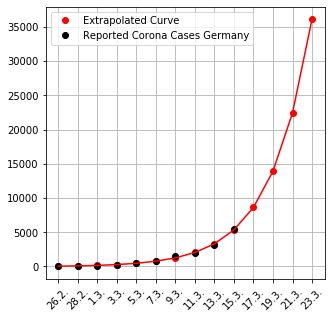

In [2]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

"""
Source: Johns Hopkins Website
https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
26.02. : 27
28.02. : 48
01.03. : 130
03.03. : 196
05.03. : 481 
07.03. : 847
09.03. : 1250 (estimated)
11.03. : 1908 (21:00)
13.03. : 3156
15.03. : 5426 (21:00)
"""

def func(x, a, b, c):
    return a * np.exp(b * x) + c

"""
Estimate parameters
"""
yn = np.array([27., 48., 130., 196., 481., 847.0, 1500, 1908, 3156, 5426])
xn = np.arange(len(yn))
popt, pcov = curve_fit(func, xn, yn)

"""
Prediction
"""
time_index = pd.date_range('2020-02-26', '2020-3-23', freq='d')
ticklabels = [str(item.day)+"."+str(item.month)+"." for item in time_index[::2]]
xp = np.arange(len(ticklabels))

"""
Plotting
"""                          
infected = func(xp, *popt)
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(xp, func(xp, *popt), 'ro', label="Extrapolated Curve")
ax.plot(xn, yn, 'ko', label="Reported Corona Cases Germany")
ax.plot(xp, func(xp, *popt), 'r-')
ax.set_xticks(xp)
ax.set_xticklabels(ticklabels, rotation = 45)
ax.legend()
plt.grid()
plt.show()
